# Academic Success Classification Model

***

### Exploratory Data Analysis

In [17]:
# Importing Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

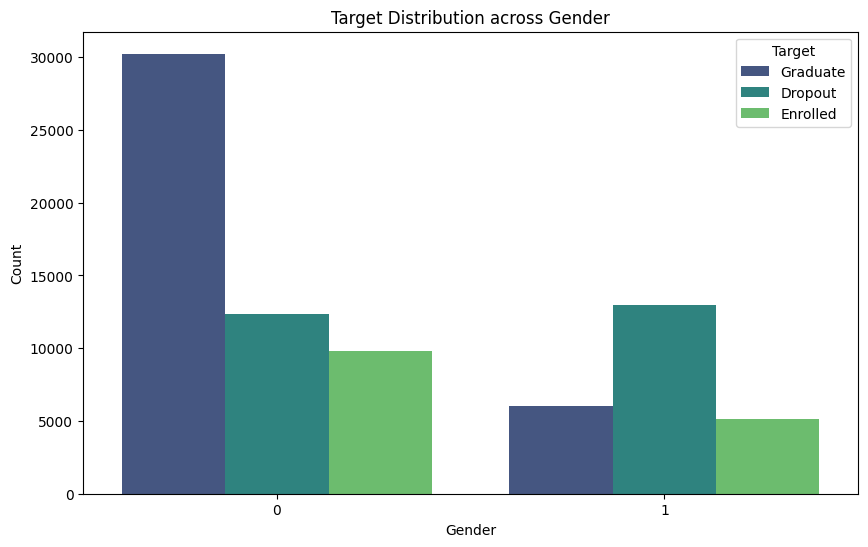

In [19]:
# checking the target distribution across gender
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x='Gender', hue='Target', palette='viridis')
plt.title("Target Distribution across Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')
plt.show()

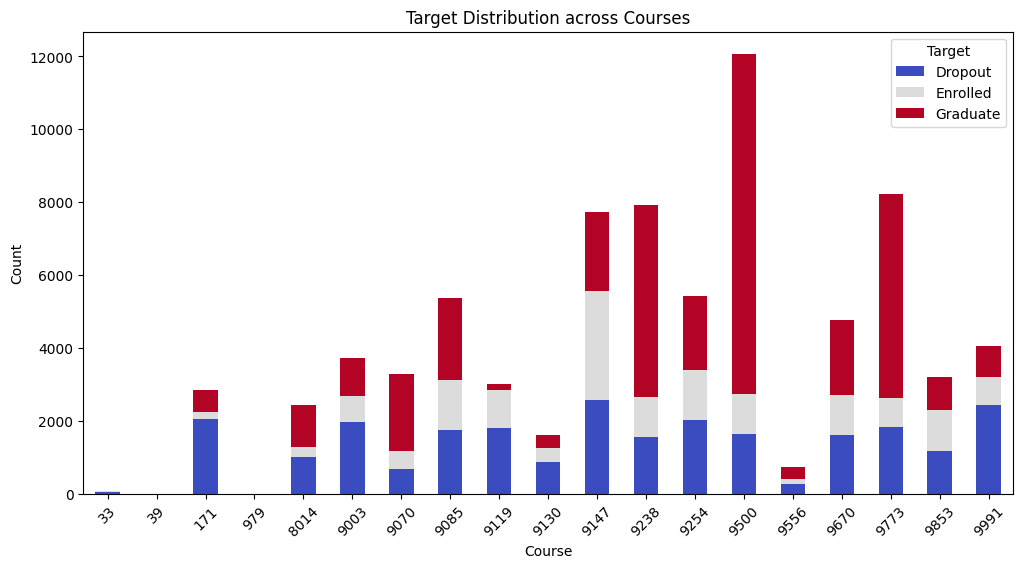

In [20]:
# Calculate the count of Target categories for each course
coursewise_Target = train_data.groupby(['Course', 'Target']).size().unstack(fill_value=0)

# plot Stacked bar chart
coursewise_Target.plot(kind='bar', stacked=True, figsize=(12,6), colormap= 'coolwarm')
plt.title('Target Distribution across Courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')
plt.xticks(rotation=45)
plt.show()

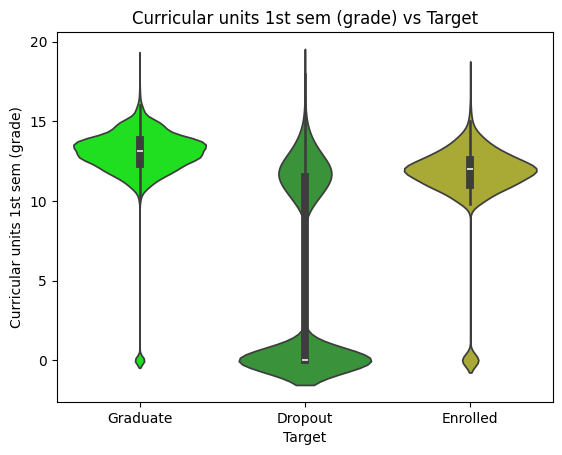

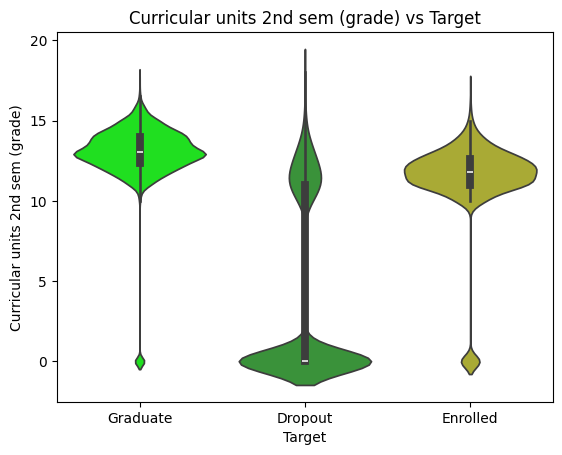

In [21]:
custom_palette = {'Enrolled': '#bcbd22', 'Dropout': '#2ca02c', 'Graduate':'#00ff00'}

#plot violin chart for 1st and 2nd sem grade units vs Target
for column in ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']:
    sns.violinplot(data=train_data, x='Target', y=column, hue='Target', palette=custom_palette, legend=False)
    plt.title(f'{column} vs Target')
    plt.show()

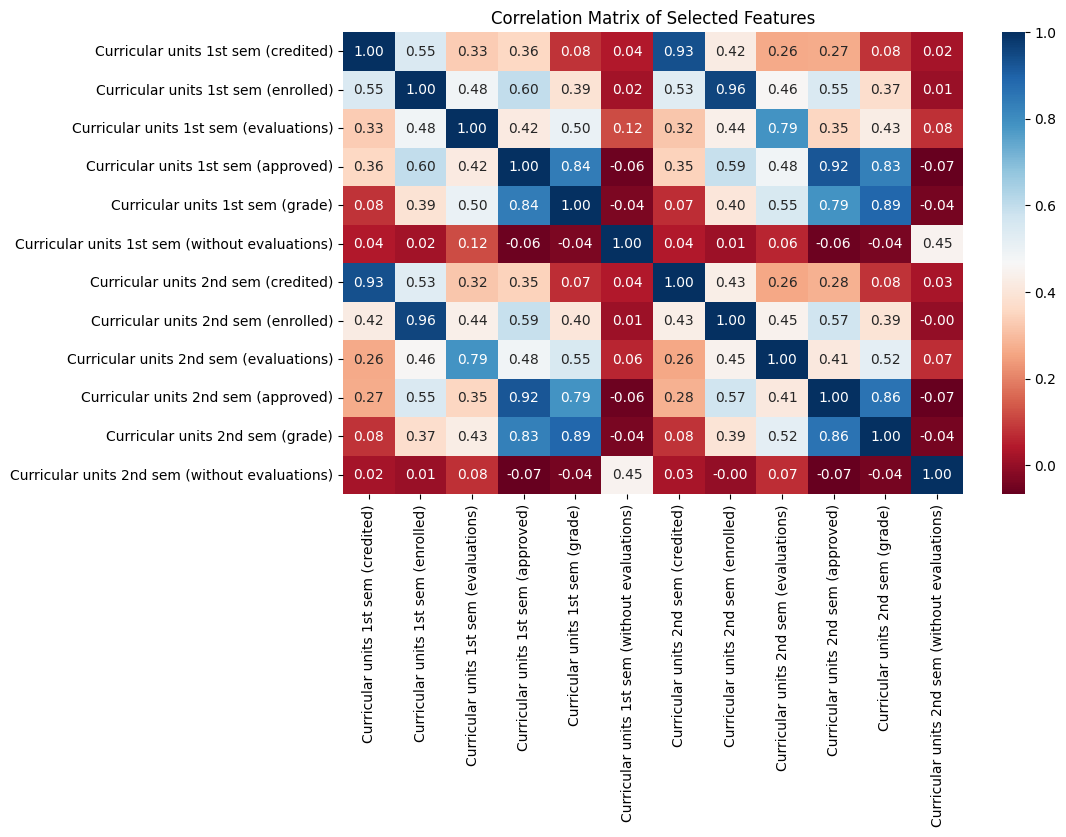

In [31]:
Columns_needed1 = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']
subset1 = train_data[Columns_needed1]

# Checking Correlation between the curricular units variables 
correlation_matrix1 = subset1.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap= 'RdBu', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Selected Features")
plt.show()

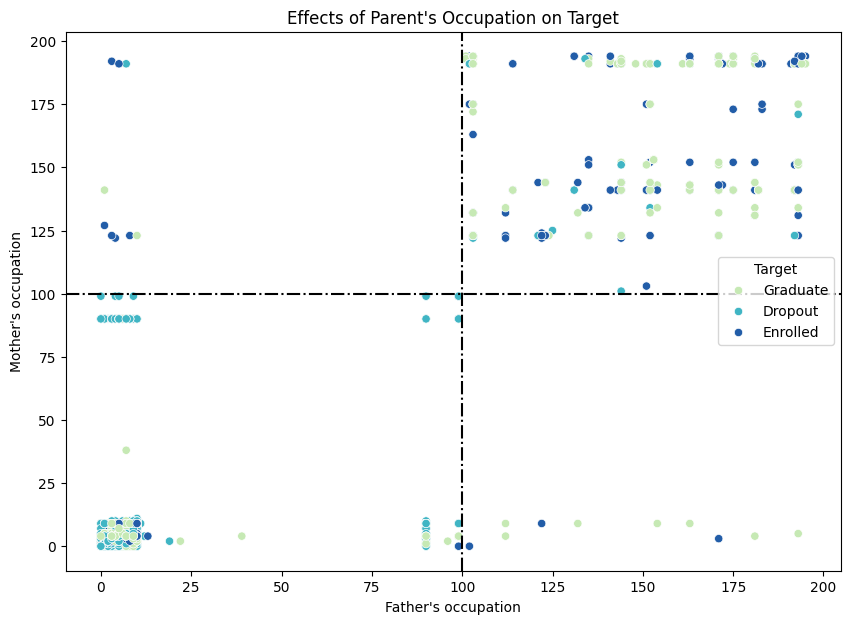

In [32]:
# To check Parents occuption effects on Target

#fathers_target_counts = train.groupby(['Father\'s occupation', 'Target']).size().unstack(fill_value=0)
#fathers_target_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=color_theme)

plt.figure(figsize=(10,7))

sns.scatterplot(x= train_data['Father\'s occupation'], 
                y= train_data['Mother\'s occupation'], 
                hue= train_data['Target'],
                palette='YlGnBu')
plt.title('Effects of Parent\'s Occupation on Target')
plt.axhline(y=100, linestyle='-.', color= 'black')
plt.axvline(x=100, linestyle='-.', color= 'black')
plt.show()

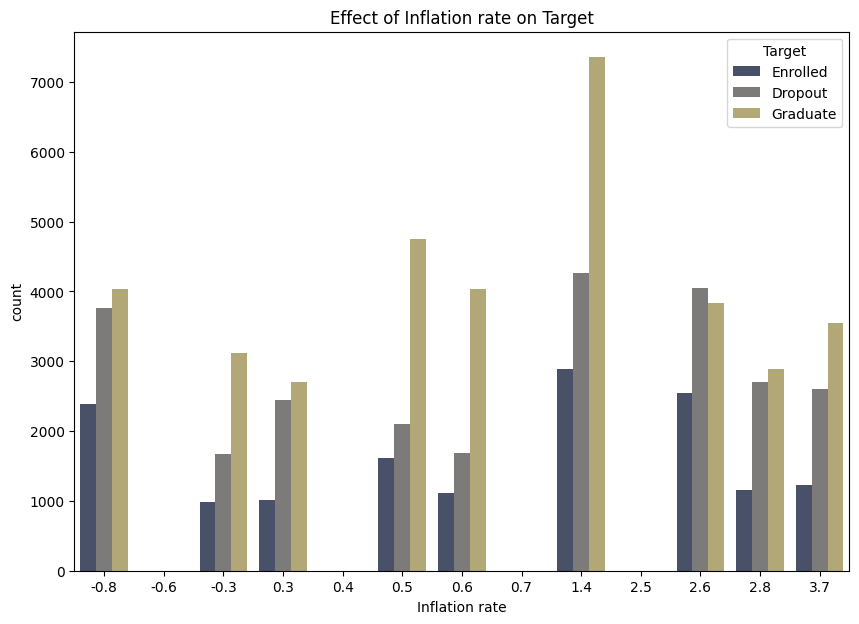

In [28]:
# Effect of Inflation rate on Target

plt.figure(figsize=(10,7))
sns.countplot(data= train_data, x= 'Inflation rate', hue= 'Target', palette= 'cividis')
plt.title('Effect of Inflation rate on Target')
plt.show()

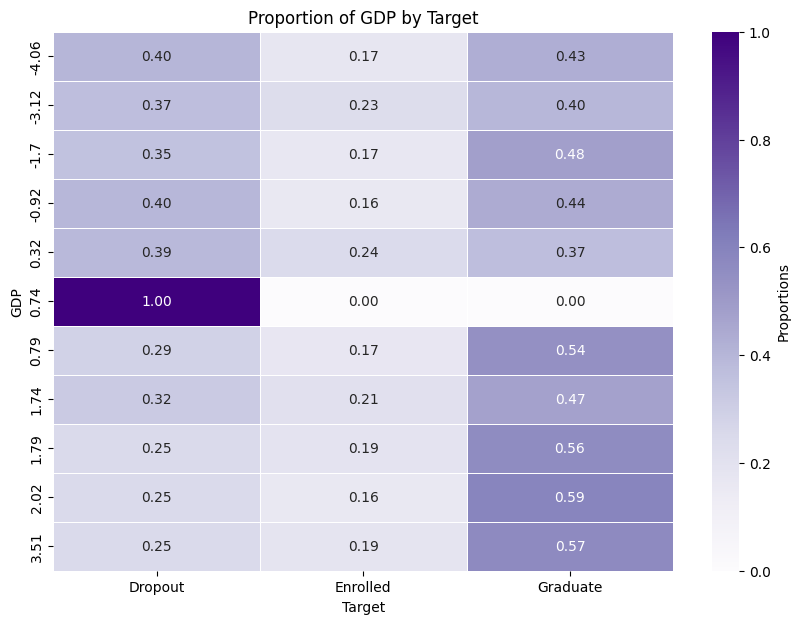

In [25]:
#Effect of GDP on Target

gdp_percent= train_data.groupby(['GDP','Target']).size().unstack(fill_value=0)
gdp_percent= gdp_percent.div(gdp_percent.sum(axis=1), axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(gdp_percent, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Proportions'})
plt.title('Proportion of GDP by Target')
plt.show()

***